# Crime Representation of Minorities in Sweden

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

overrep_df = pd.read_table('respondent_birth_country_overrepresentation.txt', sep='|')
overrep_df.head()

,country of birth,percentage of suspects,over representation
0,Nordic countries except Sweden,4.7,1.4
1,"EU15 Excluding Denmark, Finland, Sweden",1.2,1.1
2,New EU 10 countries,1.6,1.8
3,Other European countries including Turkey and ...,5.4,2.1
4,"USA, Canada, Australia, New Zealand",0.2,0.9


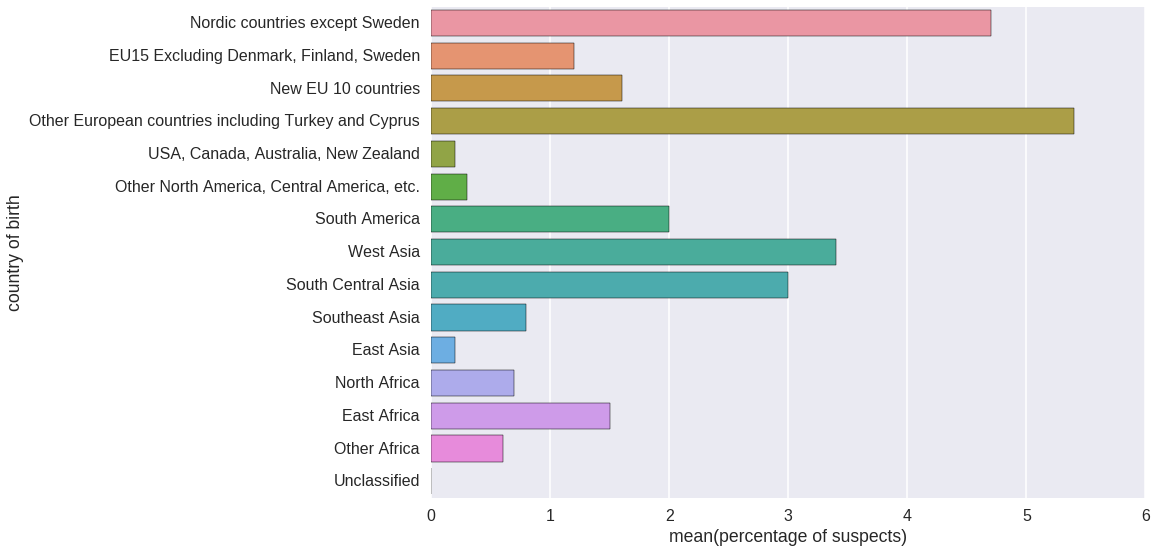

In [43]:
sns.set_context("poster")
sns.barplot(y="country of birth", x="percentage of suspects", data=overrep_df);
plt.show()

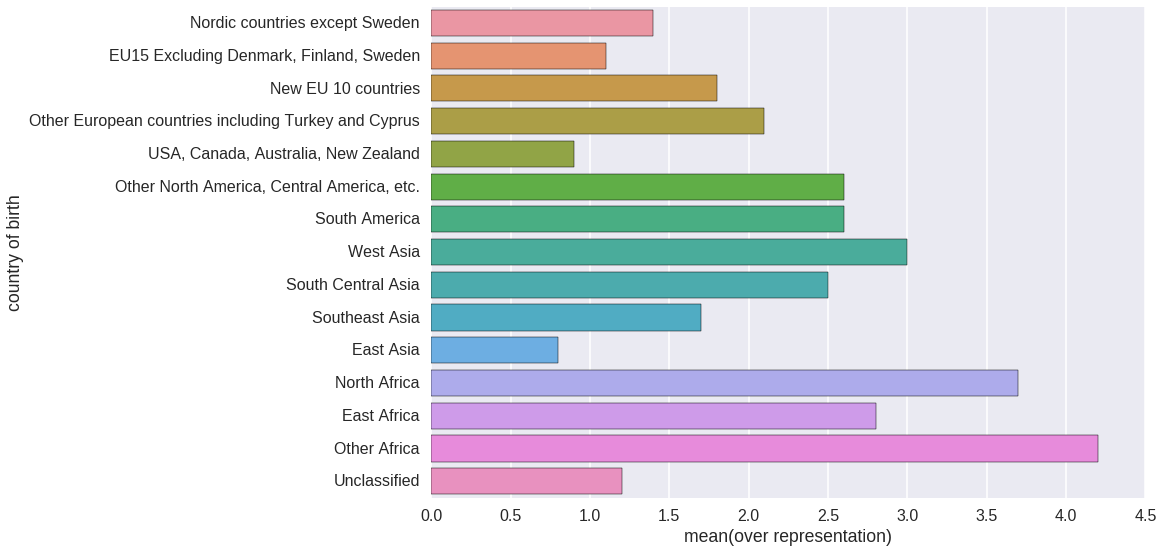

In [44]:
sns.barplot(y="country of birth", x="over representation", data=overrep_df);
plt.show()

From these two bar graphs, it is evident that people who have an African heritage have a much greater representation as suspects in crime than any other foreign-born residents. Another visualization that I hope to accomplish is to relate each of the regions specified with a map. I will also put these bar graphs side by side, as to make it easier to compare each category.

In [6]:
crime_dist_df = pd.read_table('crime_distribution_by_origin.txt', sep='|')
crime_dist_df.head()

,type of crime,both parents born in Sweden,one parent born in Sweden,both parents foreign born,foreign born
0,crimes against persons,21,19,20,29
1,theft,26,28,27,24
2,fraud,11,10,10,10
3,damage,4,4,4,3
4,driving offenses,19,19,19,15


In [7]:
import numpy as np

def recode_crime_dist(df):
    committers = []
    for committer in df.columns.unique():
        if committer != "type of crime":
            committers.append(committer)
    crime_types = []
    for i in range(4*len(df["type of crime"])):
        crime_types.append(df["type of crime"][i%4])
    percent_col = []
    for committer in committers:
        percent_col.append(df[committer])
    percent_col = np.squeeze(np.hstack(tuple(percent_col)))
    data = {"type of crime": pd.Series(crime_types),
            "origin": pd.Series(committers*4),
            "percent": pd.Series(percent_col)}
    data = pd.DataFrame(data)
    return data

In [8]:
recoded_crime_dist = recode_crime_dist(crime_dist_df)
recoded_crime_dist.head()

,origin,percent,type of crime
0,both parents born in Sweden,21,crimes against persons
1,one parent born in Sweden,26,theft
2,both parents foreign born,11,fraud
3,foreign born,4,damage
4,both parents born in Sweden,19,crimes against persons


In [46]:
def grouped_histogram(df):
    col_names = ['both parents born in Sweden', 'one parent born in Sweden',\
                 'both parents foreign born', 'foreign born']
    col1 = df[col_names[0]]
    col2 = df[col_names[1]]
    col3 = df[col_names[2]]
    col4 = df[col_names[3]]
    N = len(col1)

    ind = np.arange(N)  # the x locations for the groups
    width = 0.15       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, col1, width, color='#9b59b6')
    rects2 = ax.bar(ind + width, col2, width, color='#3498db')
    rects3 = ax.bar(ind + 2*width, col3, width, color='#95a5a6')
    rects4 = ax.bar(ind + 3*width, col4, width, color='#e74c3c')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Percent of Crime Committers')
    ax.set_title('Breakdown of Crime Committers by Origin')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(df["type of crime"])
    ax.set_xlabel('Types of Crime')

    ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), col_names)


    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%d' % int(height),
                    ha='center', va='bottom')

    #autolabel(rects1)
    #autolabel(rects2)
    #autolabel(rects3)
    #autolabel(rects4)

    plt.show()

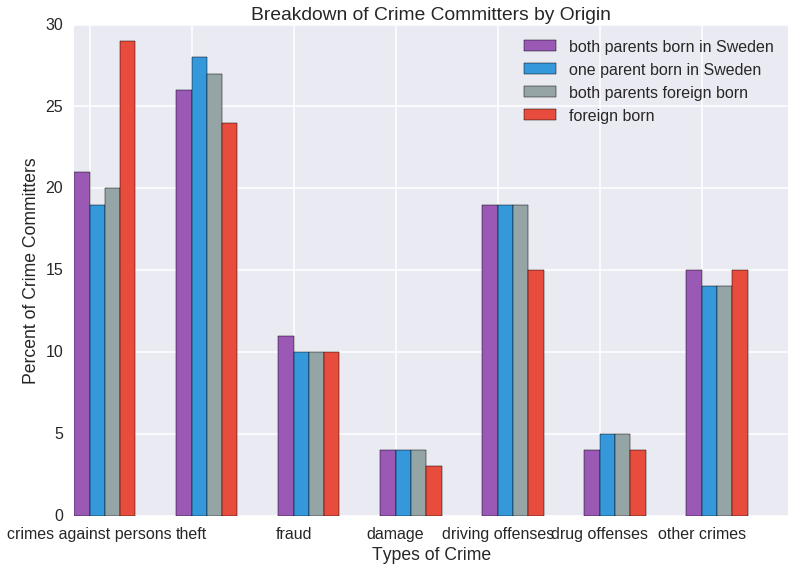

In [39]:
grouped_histogram(crime_dist_df)

This is the data on the frequency of crimes are committed against people and their origins.

In [49]:
crime_on_dist = pd.read_table('crime_on_distribution_by_origin.txt', sep='|')
crime_on_dist.head()

,type of crime,born in Sweden with Swedish-born parents,immigrant children,foreign born
0,crimes against life and health,1.40,2.50,4.10
1,lethal violence and attempted murder and mansl...,0.04,0.09,0.15
2,aggravated assault,1.40,2.40,4.10
3,crimes against freedom and peace,1.10,1.90,3.40
4,trespassing,0.25,0.46,0.50


In [54]:
def grouped_histogram2(df):
    col_names = ['born in Sweden with Swedish-born parents', 'immigrant children',\
                 'foreign born']
    col1 = df[col_names[0]]
    col2 = df[col_names[1]]
    col3 = df[col_names[2]]
    N = len(col1)

    ind = np.arange(N)  # the x locations for the groups
    width = 0.2       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, col1, width, color='#9b59b6')
    rects2 = ax.bar(ind + width, col2, width, color='#3498db')
    rects3 = ax.bar(ind + 2*width, col3, width, color='#95a5a6')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Percent of Crime Committers')
    ax.set_title('Breakdown of People that Crimes are Committed Against')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(df["type of crime"])
    ax.set_xlabel('Types of Crime')

    ax.legend((rects1[0], rects2[0], rects3[0]), col_names)


    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%d' % int(height),
                    ha='center', va='bottom')

    #autolabel(rects1)
    #autolabel(rects2)
    #autolabel(rects3)
    plt.show()

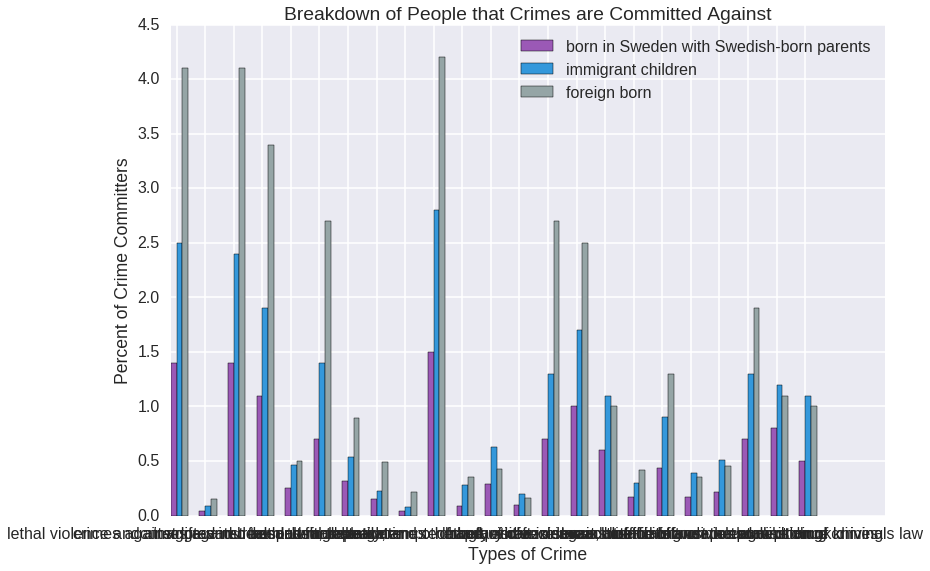

In [55]:
grouped_histogram2(crime_on_dist);